In [2]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

df=pandas.read_excel('data-14-01.xlsx')
print(df)

       CLLI_OID       CL_NO  LINE_NO INCUR_DATE_FROM INCUR_DATE_TO BEN_HEAD  \
0       4452042  1404090122     99.1      2014-01-30    2014-01-30    S-GHF   
1       9211901  1403060586     58.0      2014-01-28    2014-01-28    S-YPF   
2       9211897  1403060586     57.0      2014-01-28    2014-01-28    S-GHF   
3       9211895  1403060586     56.0      2014-01-27    2014-01-27    S-YPF   
4      44122587  1506090532     56.0      2014-01-01    2014-01-01    S-YPF   
...         ...         ...      ...             ...           ...      ...   
41687  58165199  1601150066      1.0      2014-01-26    2014-01-26    S-GHF   
41688  58173526  1601190090      1.0      2014-01-28    2014-01-28   S-ZFYP   
41689  59304513  1602160065      1.0      2014-01-05    2014-01-05    S-CJF   
41690  20542423  1812040001      1.0      2014-01-15    2014-01-15   NS-YPF   
41691  86456481  2010100002      1.0      2014-01-01    2014-01-01    S-YPF   

      SCMA_OID_BEN_TYPE DIAG_CODE DIAG_DESC SCMA_OI

In [3]:
print(df.head().T)

                                      0                    1  \
CLLI_OID                        4452042              9211901   
CL_NO                        1404090122           1403060586   
LINE_NO                            99.1                 58.0   
INCUR_DATE_FROM     2014-01-30 00:00:00  2014-01-28 00:00:00   
INCUR_DATE_TO       2014-01-30 00:00:00  2014-01-28 00:00:00   
...                                 ...                  ...   
BEN_HEAD_TYPE                       NaN                  YPF   
PAY_PCT_LIST                        NaN                  NaN   
CL_CLAIM_FORMULA                    NaN                  NaN   
CL_LINE_FORMULA                     NaN                  NaN   
CL_INVOICE_FORMULA                  NaN                  NaN   

                                      2                    3  \
CLLI_OID                        9211897              9211895   
CL_NO                        1403060586           1403060586   
LINE_NO                            57.0

In [ ]:
# print every column with the first row
for col in df.columns:
    print(col, df[col][0])


    


CLLI_OID 4452042
CL_NO 1404090122
LINE_NO 99.1
INCUR_DATE_FROM 2014-01-30 00:00:00
INCUR_DATE_TO 2014-01-30 00:00:00
BEN_HEAD S-GHF
SCMA_OID_BEN_TYPE BENEFIT_TYPE_OP
DIAG_CODE C22.900
DIAG_DESC 肝恶性肿瘤
SCMA_OID_CL_LINE_STATUS CL_LINE_STATUS_AC
ORG_PRES_AMT RMB .64
ORG_PRES_AMT_VALUE 0.64
APP_AMT 0.32
BEN_SPEND 0.32
CODES R530, W220, W270
PROV_CODE 2729.0
PROV_NAME 东方肝胆外科医院
PAYEE_LAST_NAME nan
PAYEE_FIRST_NAME C
PAY_DATE 2014-06-10 00:00:00
PAY_AMT RMB .32
PAY_AMT_USD 0.32
CRT_USER ruanjie
CRT_DATE 2014-05-29 00:00:00
UPD_USER ruanjie
UPD_DATE 2014-06-09 00:00:00
RCV_DATE 2014-04-09 00:00:00
MBR_NO 6822900
MBR_FIRST_NAME C
MBR_LAST_NAME nan
SCMA_OID_PROD_TYPE PRODUCT_MD
SCMA_OID_CL_STATUS CL_STATUS_FC
STR_CRT_DATE 5292014
STR_UPD_DATE 6092014
BARCODE CBBAAAN531
PRI_CORR_BRKR_NAME BSI
POHO_NO 43000
SCMA_OID_CL_TYPE CL_TYPE_M
SCMA_OID_COUNTRY_TREATMENT COUNTRY_086
RJ_CODE_LIST CL_WARN_CODE_W220; CL_WARN_CODE_W270; CL_REJ_CODE_R530
RECHARGE_AMT 0.0
REJECTED_AMT -0.32
PAYMENT_STATUS nan
PAYME

In [20]:
## 遍历全部数据，查看是否有全部SCMA_OID_CL_LINE_STATUS包含CL_LINE_STATUS
for i in range(len(df)):
    ## 如果缺失
    if pandas.isna(df['SCMA_OID_CL_LINE_STATUS'][i]) or pandas.isna(df['CL_LINE_STATUS'][i]):
        print(i+"缺失")
        continue
    
    
    ## 如果SCMA_OID_CL_LINE_STATUS不包含CL_LINE_STATUS
    if df['SCMA_OID_CL_LINE_STATUS'][i][-2:] != df['CL_LINE_STATUS'][i]:
        print(df['SCMA_OID_CL_LINE_STATUS'][i], df['CL_LINE_STATUS'][i])
## 全部对应


    


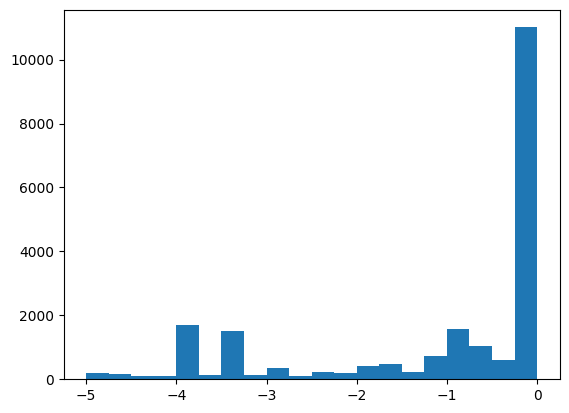

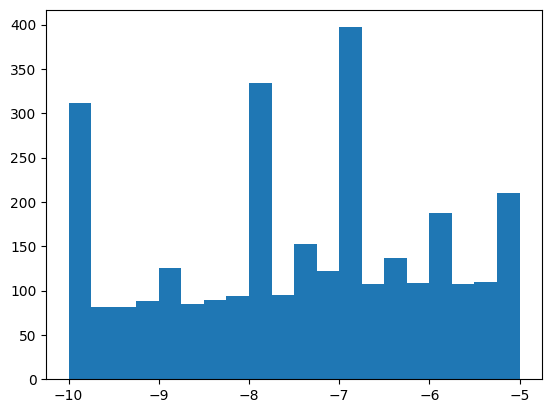

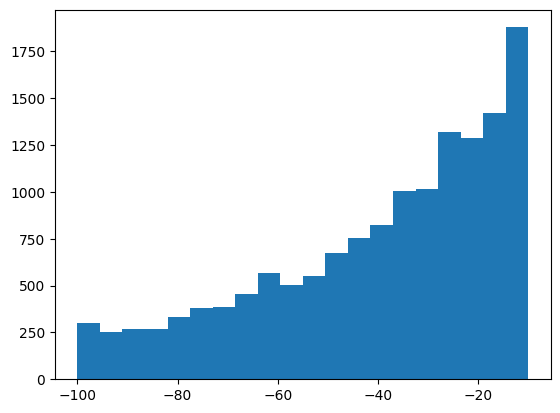

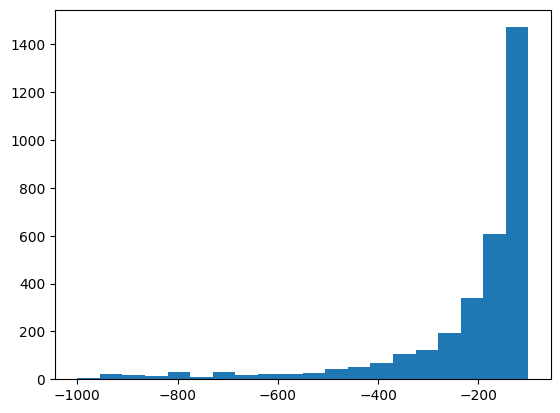

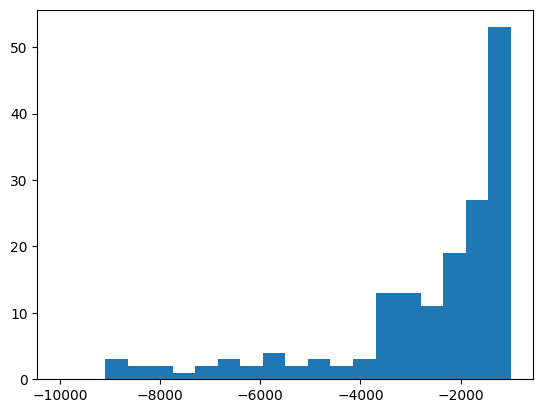

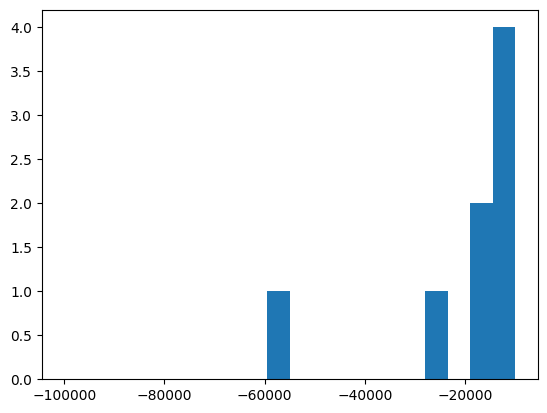

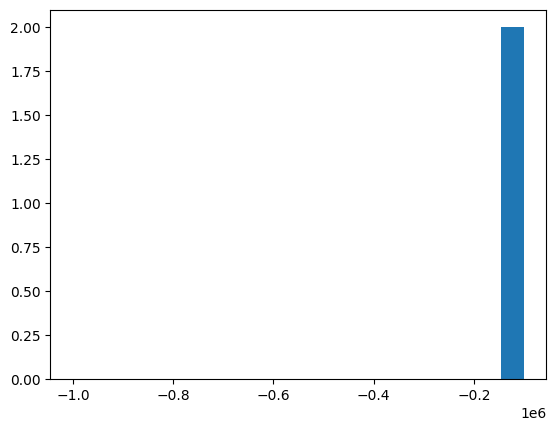

In [ ]:
## 查看REJECTED_AMT的分布
plt.hist(df['REJECTED_AMT'], bins=20,range=(-5,0))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-10,-5))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-100,-10))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-1000,-100))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-10000,-1000))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-100000,-10000))
plt.show()
plt.hist(df['REJECTED_AMT'], bins=20,range=(-1000000,-100000))
plt.show()
## 极度右偏，取对数

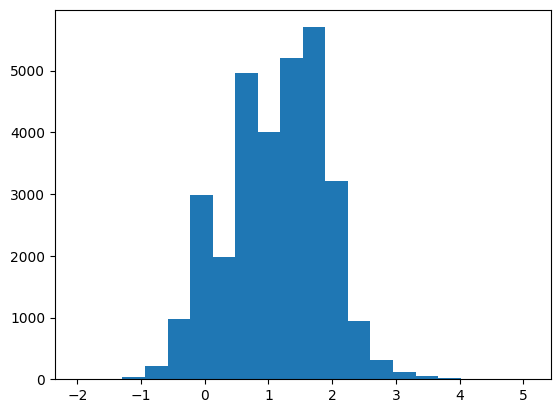

1.1135979800178288
0.7767022054628421


In [50]:
rejected_amt = df['REJECTED_AMT']
rejected_amt = np.array(rejected_amt)
## 去除nan
rejected_amt = rejected_amt[~np.isnan(rejected_amt)]
## 去掉0
rejected_amt = rejected_amt[rejected_amt != 0]
## log10
rejected_amt = np.log10(-rejected_amt)
## hist
plt.hist(rejected_amt, bins=20)
plt.show()
## 查看mean和std
print(np.mean(rejected_amt))
print(np.std(rejected_amt))

In [10]:
df_wcode=pandas.read_excel('警告代码.xlsx')


In [11]:
print(df_wcode)

        SYS_TYPE SYS_CODE                                          CODE_DESC
0   CL_WARN_CODE     W010                                                 追讨
1   CL_WARN_CODE     W020                                               超额索赔
2   CL_WARN_CODE     W030                                         所选房型高于保单规定
3   CL_WARN_CODE     W040                                     首次投保2年内发生的重大疾病
4   CL_WARN_CODE     W050                                               搁置付款
5   CL_WARN_CODE     W055                                            还未发缴费通知
6   CL_WARN_CODE     W056                                        保单还有尚未收回的款项
7   CL_WARN_CODE     W057                                        保单还有尚未收回的款项
8   CL_WARN_CODE     W060                                               补充产品
9   CL_WARN_CODE     W070                                      批准的理赔大于等于5000
10  CL_WARN_CODE     W080                                        当前的医疗计划不止一种
11  CL_WARN_CODE     W090                                           住院不足18小时

In [14]:
df_disease_code=pandas.read_excel('疾病代码.xlsx',header=None)

In [15]:
print(df_disease_code)

              0             1
0       A00.000       古典生物型霍乱
1       A00.100        埃尔托型霍乱
2       A00.900            霍乱
3       A01.000            伤寒
4      A01.001+         伤寒性肝炎
...         ...           ...
22859   Z99.201          血液透析
22860   Z99.200         依赖肾透析
22861   Z99.300         依赖轮椅者
22862   Z99.800  依赖特指可启动机器和装置
22863   Z99.900    依赖可启动机器和装置

[22864 rows x 2 columns]
